In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150

In [3]:
df = pd.read_csv("automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Data Cleaning

In [7]:
# find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

# List out the values which are are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

# setting the missing value to mean of price and convert data type into integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(int).mean()
df['price'] = df['price'].replace('?', pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [8]:
# Cleaning the horsepower losses field
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [9]:
# Cleaning the Normalized losses field
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int32

Sekarang kita akan menghitung central tendency dari nilai pada kolom _height_. Ingat jika mengambil hanya satu kolom pada dataset berarti kita sedang melakukan _Univariate analysis_

In [10]:
# calculate mean, median, and mode of dataset height

mean = df['height'].mean()
median = df['height'].median()
mode = df['height'].mode()
print(mean, "\n", median, "\n", mode)

53.72487804878049 
 54.1 
 0    50.8
Name: height, dtype: float64


Sekarang mari kita visualisasikan

C:\Users\gilan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\gilan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


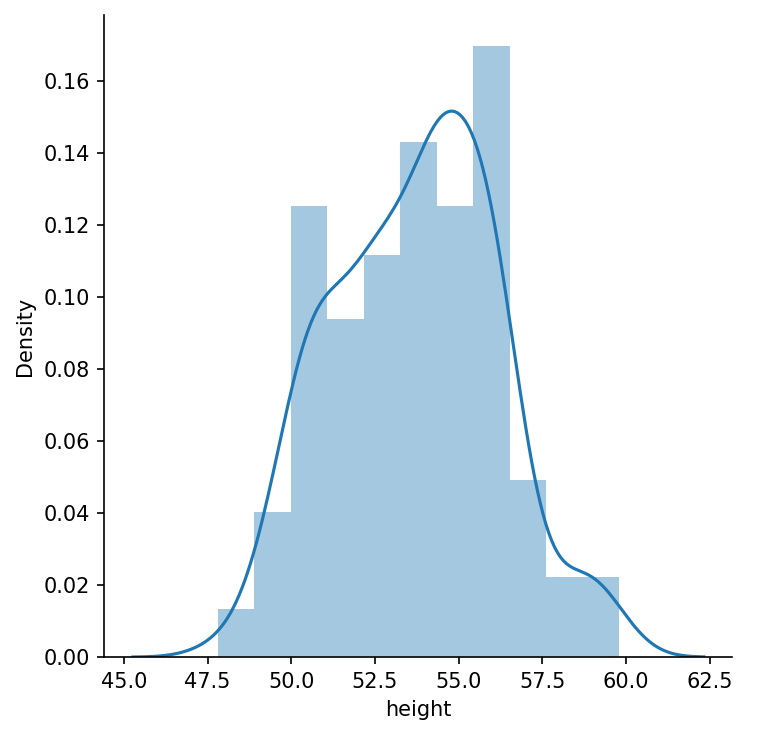

In [13]:
# distribution plot
sns.FacetGrid(df, size=5).map(sns.distplot, "height").add_legend()

Dari data diatas, kita bisa mengamati bahwa tinggi dari maximum cars berada pada interval 53 sampai 57

Sekarang mari plot untuk harga. Karena tipe data dari harga adalah objek maka pertama kita ubah tipe datanya dulu.

C:\Users\gilan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\gilan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


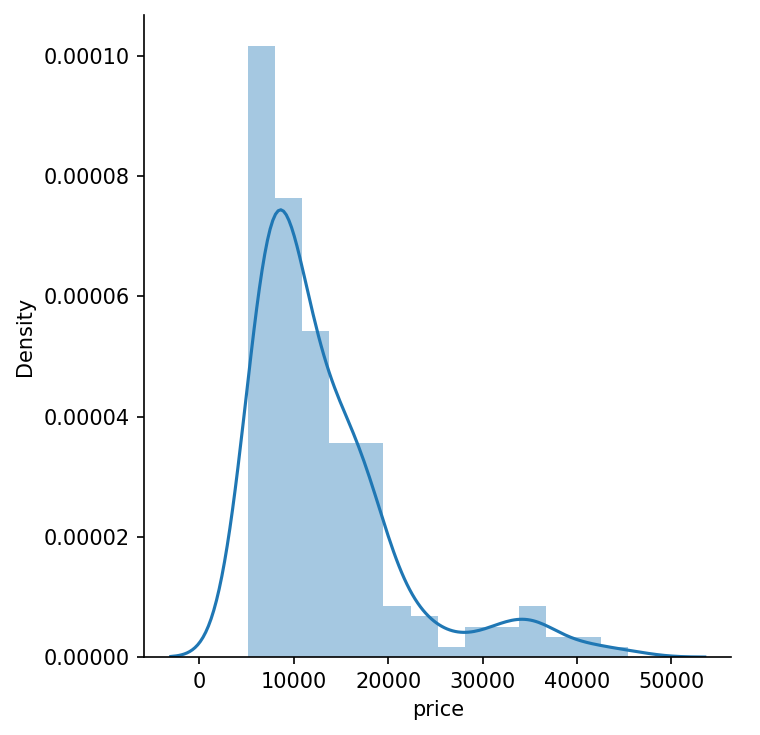

In [14]:
# distribution price plot
sns.FacetGrid(df, size=5).map(sns.distplot, "price").add_legend()

Dari gambar grafik diatas kita bisa mengatakan bahwa harga pada interval 5000 sampai 45000 tapi harga mobil maximum berada pada interval 5000 sampai 10000

BoxPlot adalah efektif visualization dari pengukuran statistik seperti median dan quartiles dalam univariate analysis.

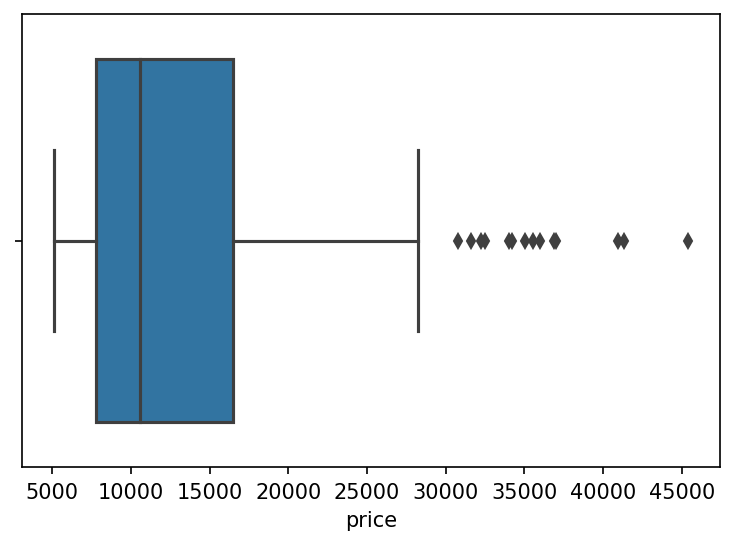

In [15]:
sns.boxplot(x="price", data=df)
plt.show()

Terlihat ada beberapa outlier yang ada.

**Bivariate Analysis**

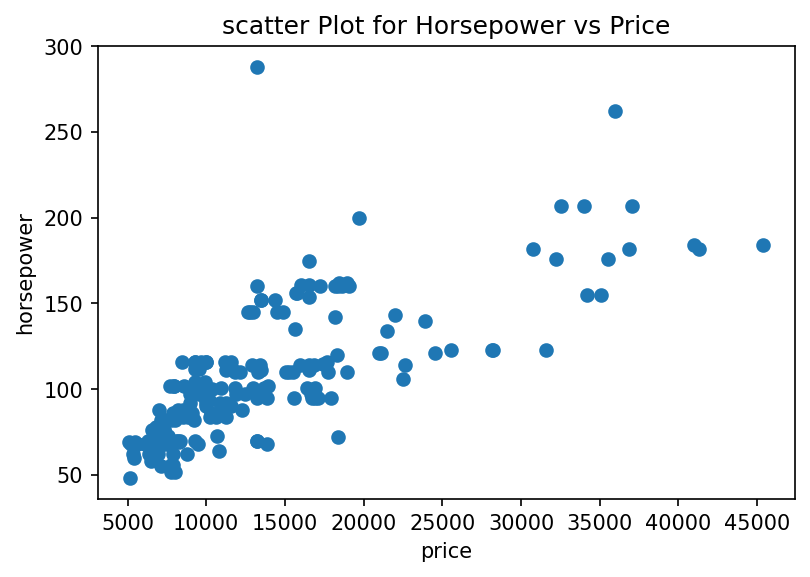

In [18]:
# plot relationship between "horsepower" and "price"

plt.scatter(df['price'], df['horsepower'])
plt.title("scatter Plot for Horsepower vs Price")
plt.xlabel("price")
plt.ylabel("horsepower")
plt.show()

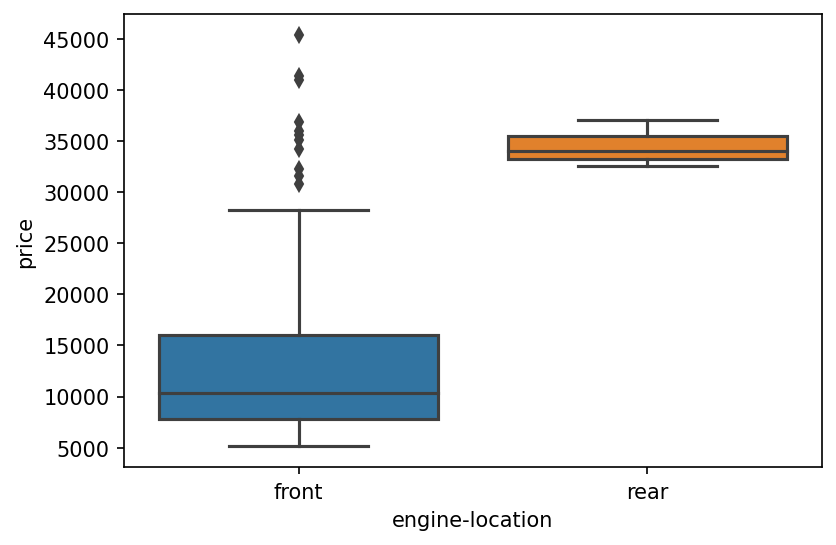

In [19]:
# boxplot
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

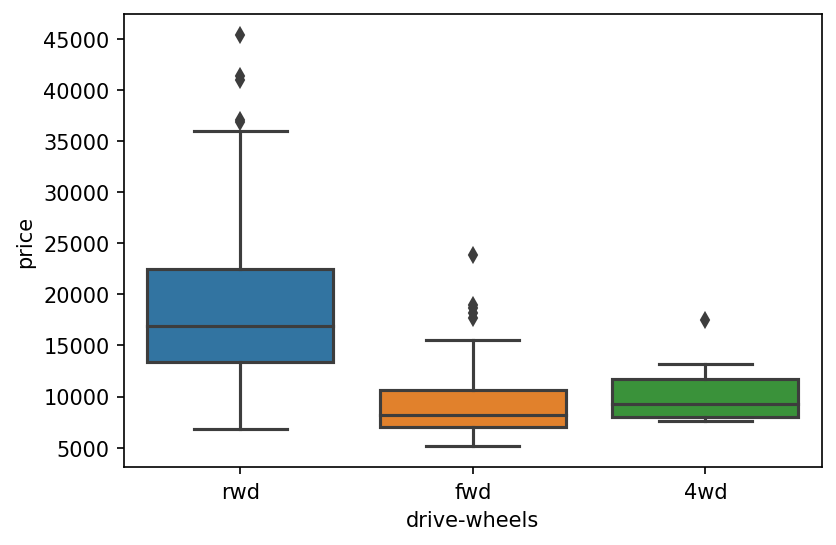

In [20]:
# boxplot to visualize the distribution of "price" with "drive-wheels"
sns.boxplot(x="drive-wheels", y="price", data=df)

Gambar diatas menilustrasikan interval dari harga dengan wheel types. Boxplot menunjukkan rata-rata dan median dari harga terhadap wheeltypes and some outliers.

**Multivariate Analysis**

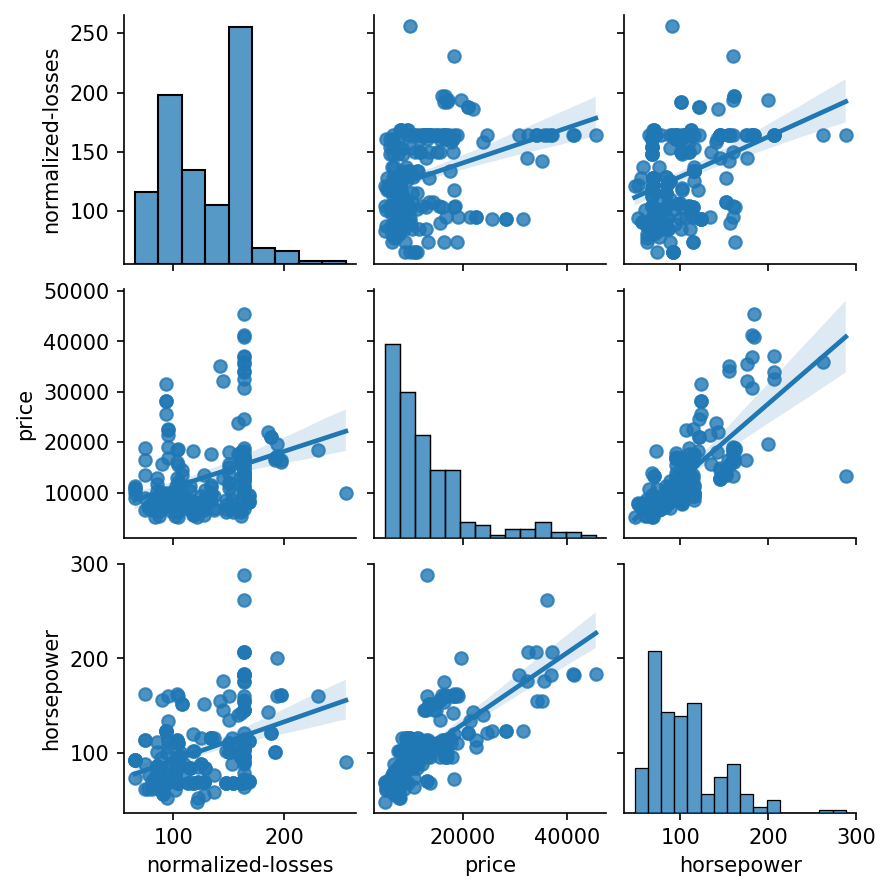

In [22]:
# pair plot with plot type regression
sns.pairplot(df, height=2, vars = ['normalized-losses', 'price', 'horsepower'], kind='reg')

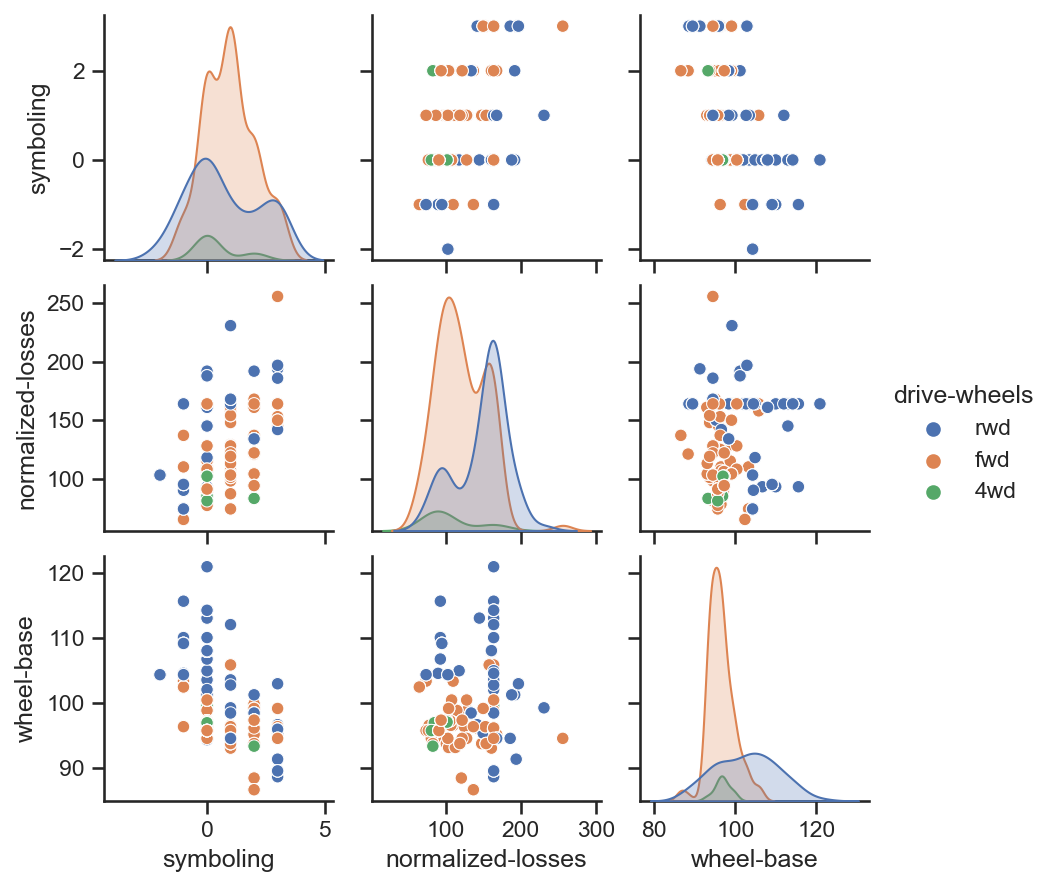

In [24]:
# pair plot (matrix scatter plot) of few columns
sns.set(style='ticks', color_codes=True)
sns.pairplot(df, height=2, vars=['symboling', 'normalized-losses', 'wheel-base'], hue = "drive-wheels")
plt.show()

In [26]:
from scipy import stats

corr = stats.pearsonr(df['price'], df['horsepower'])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.5910332446597316e-39
cor:		 0.757945621793524


Disini kita lihat bahwa korelasi antara kedua variabel tersebut adalah 0.757945..... yang lebih mendekati ke 1 sehingga kita bisa menyimpulkan bahwa harga dan horsepower highly positively correlated. Cek menggunakan pandas

In [27]:
correlation = df.corr(method='pearson')
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.442093,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,-0.035823,0.034606,-0.082201
normalized-losses,0.442093,1.000000,0.042699,0.155090,0.209908,-0.346399,0.262187,0.300268,-0.097432,0.371238,-0.344018,-0.307189,0.326489
wheel-base,-0.531954,0.042699,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.470414,-0.544082,0.583168
length,-0.357612,0.155090,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.670909,-0.704662,0.682986
width,-0.232919,0.209908,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.642704,-0.677218,0.728699
height,-0.541038,-0.346399,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.262187,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.300268,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.653658,-0.677470,0.861752
compression-ratio,-0.178515,-0.097432,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,0.324701,0.265201,0.070990
horsepower,0.071380,0.371238,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,-0.803140,-0.770905,0.757946


Sekarang mari kita visualisasikan analisis korelasi dengan menggunakan heatmap. Heatmap adalah tekhnik terbaik untuk membuat grafik lebih bagus dan lebih mudah diinterpretasi

<AxesSubplot:>

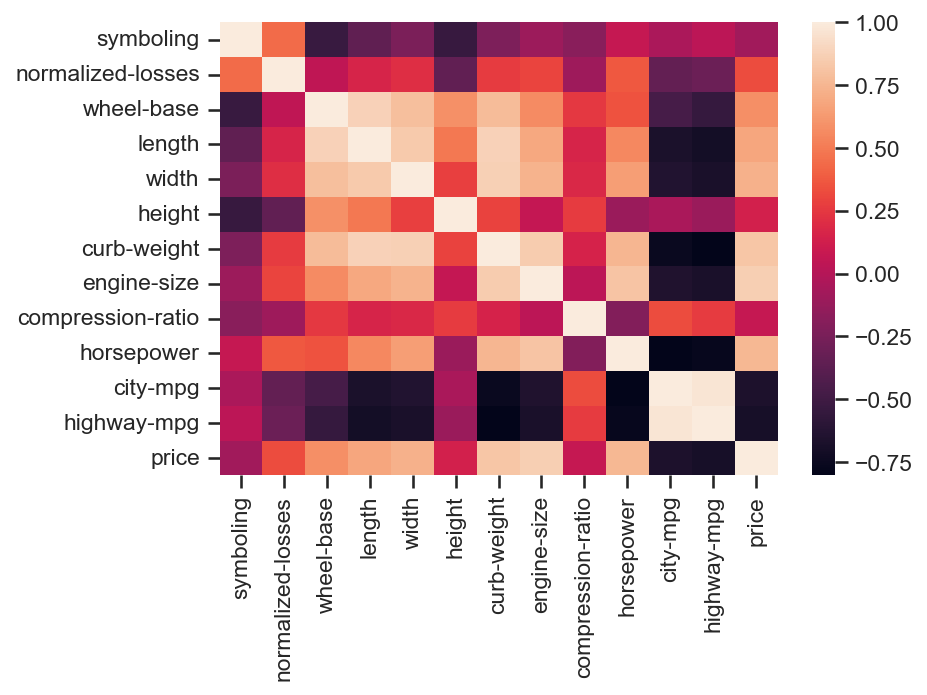

In [29]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

Koefisien mendekati 1 berarti hal tersebut membuktikan korelasi yang kuat, begitupun sebaliknya.

**Multivariate Analysis over Titanic dataset**

In [30]:
# load data set
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titanic.shape

(891, 12)

mari kita lihat nan value

In [32]:
total = titanic.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [33]:
# percentage of woman survived
women = titanic.loc[titanic.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

# percentage of men survived
men = titanic.loc[titanic.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(str(rate_women) + " % of women  who survived")
print(str(rate_men) + " % of men who survived")

0.7420382165605095 % of women  who survived
0.18890814558058924 % of men who survived


Bisa dilihat jumlah dari females survival was high, jadi jenis kelamin memiliki kontribusi untuk menganalisa. Lets visualize in number 

ValueError: min() arg is an empty sequence

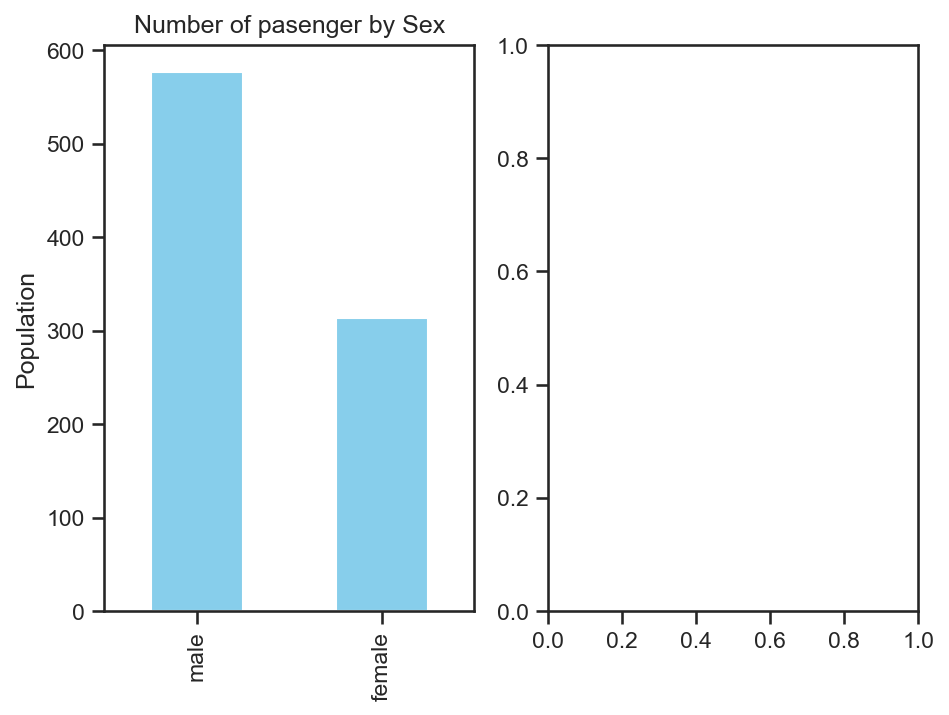

In [39]:
titanic['Survived'] = titanic['Survived'].map({0:"not_survived", 1:"survived"})

fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number of pasenger by Sex")
ax[0].set_ylabel("Population")
ax1 = sns.countplot(x="Sex", hue="Survived", data=titanic)
ax1.set_title("Sex: Survived vs Dead")
plt.show()

ValueError: min() arg is an empty sequence

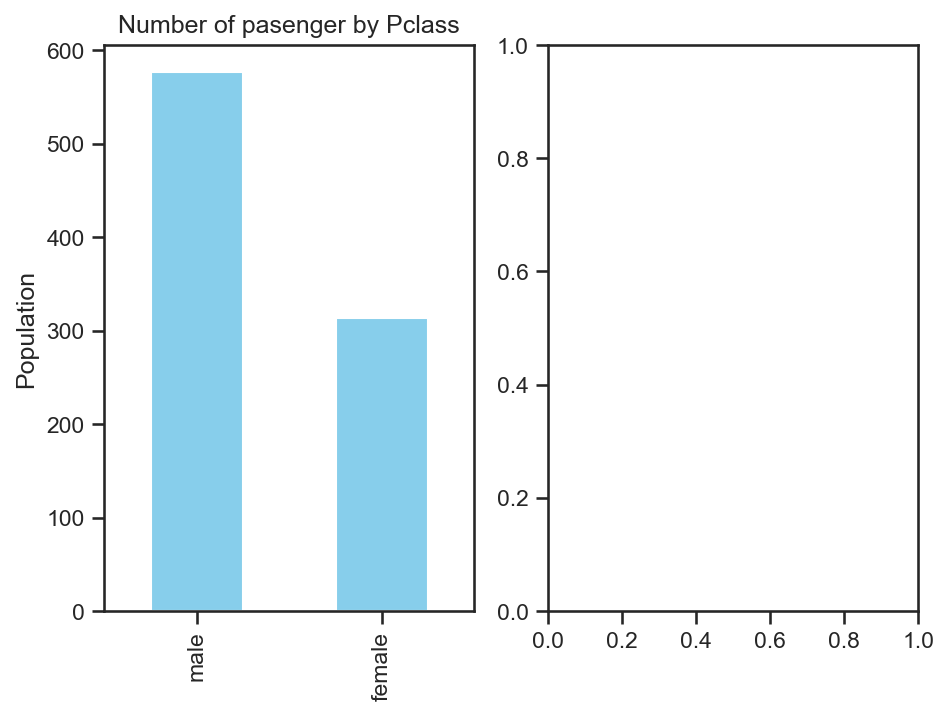

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number of pasenger by Pclass")
ax[0].set_ylabel("Population")
sns.countplot(x="Pclass", hue="Survived", data=titanic, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()